# Cogs 108 Final Project

Bernard Suwirjo

Ben Hazarian

Cesar Reyes

Eric Jiang

Gauthier Pred'Astor Gris

In [1]:
# Necessary Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Display plots directly in the notebook instead of in a new window
%matplotlib inline

In [2]:
# Load Datasets

# Baseball Dataset
data = pd.read_csv('data/baseball2016-2017.csv')

In [3]:
#Drop postseason games
data = data[data['season'] != "post season"]

#Drop columns that don't have effect
data = data.drop("temperature", axis=1)
data = data.drop("wind_speed", axis=1)
data = data.drop("sky", axis=1)
data = data.drop("game_hours_dec", axis=1)
data = data.drop("wind_direction", axis=1)
data = data.drop("season", axis=1)
data = data.drop("game_type", axis=1)
data = data.drop("date", axis=1)
data = data.drop("day_of_week", axis=1)
data = data.drop("start_time", axis=1)
data = data.drop("venue", axis=1)
data = data.drop("field_type", axis=1)

#Drop teams because not looking individually
#data = data.drop("away_team", axis=1)
#data = data.drop("home_team", axis=1)
data = data.drop("attendance", axis=1)


data = data.drop(data.columns[0], axis=1)
data.head()

,away_team,away_team_errors,away_team_hits,away_team_runs,home_team,home_team_errors,home_team_hits,home_team_runs,total_runs,home_team_win,home_team_loss,home_team_outcome
0,New York Mets,1,7,3,Kansas City Royals,0,9,4,7,1,0,Win
1,Philadelphia Phillies,0,5,2,Cincinnati Reds,0,8,3,5,1,0,Win
2,Minnesota Twins,0,5,2,Baltimore Orioles,0,9,4,6,1,0,Win
3,Washington Nationals,0,8,3,Atlanta Braves,1,8,1,4,0,1,Loss
4,Colorado Rockies,1,8,4,Arizona Diamondbacks,0,8,3,7,0,1,Loss


In [4]:
# Get averages of all stats
avgAwayErrors = data["away_team_errors"].mean()
avgAwayHits = data["away_team_hits"].mean()
avgAwayRuns = data["away_team_runs"].mean()

avgHomeErrors = data["home_team_errors"].mean()
avgHomeHits = data["home_team_hits"].mean()
avgHomeRuns = data["home_team_runs"].mean()

In [6]:
homeTeamSorted = data.groupby('home_team').sum()
homeTeamSorted.head()

,away_team_errors,away_team_hits,away_team_runs,home_team_errors,home_team_hits,home_team_runs,total_runs,home_team_win,home_team_loss
home_team,,,,,,,,,
Arizona Diamondbacks,50,855,493,42,765,411,904,33,48
Atlanta Braves,58,712,404,60,712,335,739,31,50
Baltimore Orioles,42,699,336,39,688,376,712,50,31
Boston Red Sox,50,734,380,40,845,477,857,47,34
Chicago Cubs,40,546,247,47,674,389,636,57,24


In [7]:
homeWinPercentages = homeTeamSorted['home_team_win']/81
homeWinPercentages

home_team
Arizona Diamondbacks             0.407407
Atlanta Braves                   0.382716
Baltimore Orioles                0.617284
Boston Red Sox                   0.580247
Chicago Cubs                     0.703704
Chicago White Sox                0.555556
Cincinnati Reds                  0.469136
Cleveland Indians                0.654321
Colorado Rockies                 0.518519
Detroit Tigers                   0.555556
Houston Astros                   0.530864
Kansas City Royals               0.580247
Los Angeles Angels of Anaheim    0.493827
Los Angeles Dodgers              0.654321
Miami Marlins                    0.493827
Milwaukee Brewers                0.506173
Minnesota Twins                  0.370370
New York Mets                    0.543210
New York Yankees                 0.592593
Oakland Athletics                0.419753
Philadelphia Phillies            0.456790
Pittsburgh Pirates               0.469136
San Diego Padres                 0.481481
San Francisco Giants    

In [8]:
awayTeamSorted = data.groupby('away_team').sum()
awayTeamSorted.head()

,away_team_errors,away_team_hits,away_team_runs,home_team_errors,home_team_hits,home_team_runs,total_runs,home_team_win,home_team_loss
away_team,,,,,,,,,
Arizona Diamondbacks,59,714,341,53,708,397,738,45,36
Atlanta Braves,41,692,314,41,702,375,689,43,37
Baltimore Orioles,41,725,368,33,709,379,747,42,39
Boston Red Sox,35,753,401,51,608,314,715,35,46
Chicago Cubs,54,735,419,47,579,309,728,34,46


In [9]:
awayWinPercentages = awayTeamSorted['home_team_loss']/81
awayWinPercentages

away_team
Arizona Diamondbacks             0.444444
Atlanta Braves                   0.456790
Baltimore Orioles                0.481481
Boston Red Sox                   0.567901
Chicago Cubs                     0.567901
Chicago White Sox                0.407407
Cincinnati Reds                  0.370370
Cleveland Indians                0.506173
Colorado Rockies                 0.407407
Detroit Tigers                   0.506173
Houston Astros                   0.506173
Kansas City Royals               0.419753
Los Angeles Angels of Anaheim    0.419753
Los Angeles Dodgers              0.469136
Miami Marlins                    0.481481
Milwaukee Brewers                0.395062
Minnesota Twins                  0.358025
New York Mets                    0.530864
New York Yankees                 0.444444
Oakland Athletics                0.432099
Philadelphia Phillies            0.419753
Pittsburgh Pirates               0.493827
San Diego Padres                 0.358025
San Francisco Giants    

In [18]:
teamScores = data
homeTeamScores = teamScores[teamScores['home_team_outcome'] == 'Win']
homeTeamScores['HomeScoreDiff'] = homeTeamScores['home_team_runs'].sub(homeTeamScores['away_team_runs'], axis=0)
homeTeamScores.head()

C:\Users\ericj\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,away_team,away_team_errors,away_team_hits,away_team_runs,home_team,home_team_errors,home_team_hits,home_team_runs,total_runs,home_team_win,home_team_loss,home_team_outcome,HomeScoreDiff
0,New York Mets,1,7,3,Kansas City Royals,0,9,4,7,1,0,Win,1
1,Philadelphia Phillies,0,5,2,Cincinnati Reds,0,8,3,5,1,0,Win,1
2,Minnesota Twins,0,5,2,Baltimore Orioles,0,9,4,6,1,0,Win,2
6,Toronto Blue Jays,0,9,2,Tampa Bay Rays,1,7,3,5,1,0,Win,1
8,St. Louis Cardinals,1,8,5,Pittsburgh Pirates,2,12,6,11,1,0,Win,1


In [21]:
homeScoreDiff = homeTeamScores.groupby('home_team').mean()['HomeScoreDiff']
homeScoreDiff.head()

home_team
Arizona Diamondbacks    3.424242
Atlanta Braves          3.290323
Baltimore Orioles       3.260000
Boston Red Sox          4.191489
Chicago Cubs            3.614035
Name: HomeScoreDiff, dtype: float64

In [22]:
teamScores = data
awayTeamScores = teamScores[teamScores['home_team_outcome'] == 'Loss']
awayTeamScores['AwayScoreDiff'] = awayTeamScores['away_team_runs'].sub(awayTeamScores['home_team_runs'], axis=0)
awayTeamScores.head()

C:\Users\ericj\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,away_team,away_team_errors,away_team_hits,away_team_runs,home_team,home_team_errors,home_team_hits,home_team_runs,total_runs,home_team_win,home_team_loss,home_team_outcome,AwayScoreDiff
3,Washington Nationals,0,8,3,Atlanta Braves,1,8,1,4,0,1,Loss,2
4,Colorado Rockies,1,8,4,Arizona Diamondbacks,0,8,3,7,0,1,Loss,1
5,Seattle Mariners,1,11,10,Texas Rangers,1,7,2,12,0,1,Loss,8
7,Los Angeles Dodgers,0,6,3,San Diego Padres,1,2,0,3,0,1,Loss,3
9,Chicago White Sox,0,11,5,Oakland Athletics,0,10,4,9,0,1,Loss,1


In [23]:
awayScoreDiff = awayTeamScores.groupby('away_team').mean()['AwayScoreDiff']
awayScoreDiff.head()

away_team
Arizona Diamondbacks    3.194444
Atlanta Braves          2.513514
Baltimore Orioles       3.461538
Boston Red Sox          3.956522
Chicago Cubs            4.595745
Name: AwayScoreDiff, dtype: float64

In [25]:
scoreDiff = pd.concat([homeScoreDiff, awayScoreDiff], sort=True, axis = 1)
scoreDiff

,HomeScoreDiff,AwayScoreDiff
Arizona Diamondbacks,3.424242,3.194444
Atlanta Braves,3.290323,2.513514
Baltimore Orioles,3.260000,3.461538
Boston Red Sox,4.191489,3.956522
Chicago Cubs,3.614035,4.595745
Chicago White Sox,3.111111,3.030303
Cincinnati Reds,3.263158,3.833333
Cleveland Indians,3.981132,3.682927
Colorado Rockies,4.333333,3.727273
Detroit Tigers,3.511111,3.292683


Text(0, 0.5, 'Avg Score Differential in Wins')

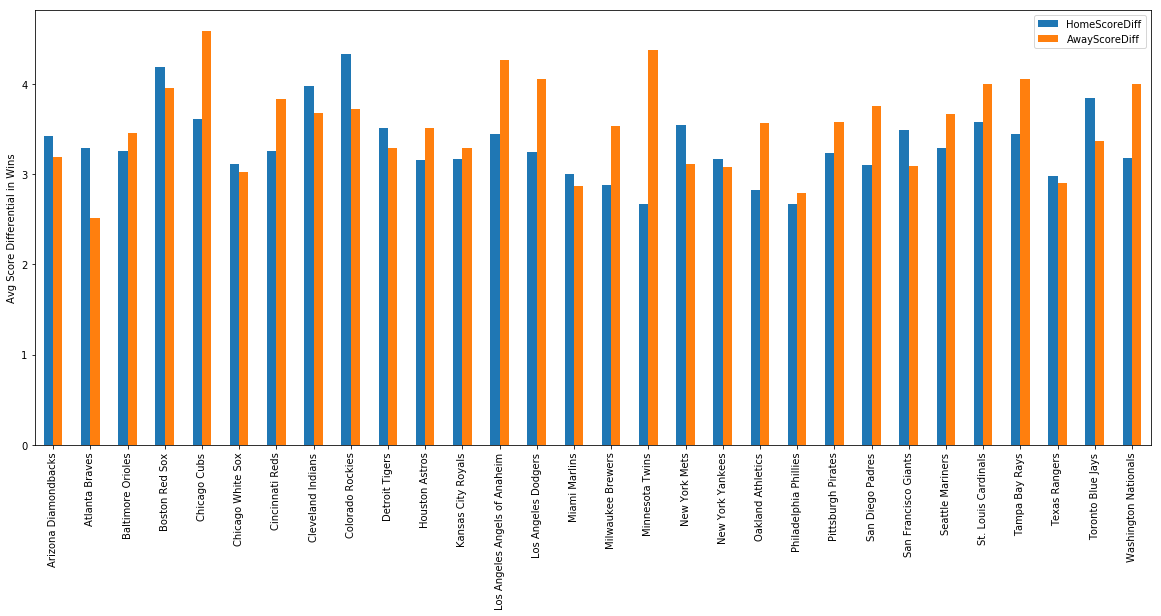

In [28]:
score_diff = scoreDiff.plot.bar(figsize=(20,8))
score_diff.set_ylabel("Avg Score Differential in Wins")